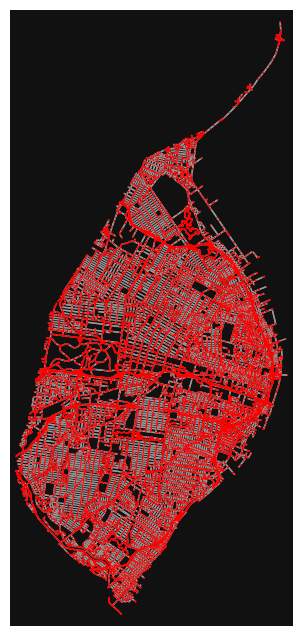

In [4]:
"""
Download data from openstreetmap for superblock analysis

Note: Max 10,000 queries per day and download < 5 GB
https://wiki.openstreetmap.org/wiki/Overpass_API#:~:text=https%3A%2F%2Flz4.overpass%2Dapi.de%2Fapi%2Finterpreter&text=Any%20of%20the%20three%20servers,about%201%2C000%2C000%20requests%20per%20day.z
"""
#import packages 
import os
import sys
path_superblocks = os.path.abspath(os.path.join(os.path.dirname("preprocessRJD"), '..'))
sys.path.append(path_superblocks)
import time
import geopandas as gpd
import networkx as nx
from shapely.geometry import Polygon, Point, LineString
import osmnx as ox
import cenpy
import folium 
import pandas 
from network import helper_network as hp_net


### Get street data from osm and filter based upon paper### 
graph1=ox.graph.graph_from_place("St.Louis, MO, USA", network_type='drive', simplify=False, 
                                 retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=False, clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(graph1, node_color="r", node_zorder=3, node_size=1)


In [12]:

#simplified graph with buffer 15m for nodes 
graph2=ox.graph.graph_from_place("St.Louis, MO, USA", network_type='drive', simplify=True, 
                                 retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=15, clean_periphery=True, custom_filter=None)
type(graph2)

networkx.classes.multidigraph.MultiDiGraph

In [13]:
# --- Convert DiGraph to Graph
G_roads_frozen = nx.to_undirected(graph2)
graph2 = nx.Graph(G_roads_frozen)
type(graph2)

networkx.classes.graph.Graph

In [19]:
for edge in graph2.edges:
    if 'tags.highw' in graph2.edges[edge] and graph2.edges[edge]['tags.highw'] == 'service' and 'tram' in G_roads.edges[edge] and G_roads.edges[edge]['tram'] == 1:
        graph2.edges[edge]['tags.highw'] = 'unclassified'


# Relabel road if service but has tram on it --> unclassified
for edge in graph2.edges:
    if graph2.edges[edge]['tags.highw'] == 'service' and graph2.edges[edge]['tram'] == 1:
        graph2.edges[edge]['tags.highw'] = 'unclassified'

KeyError: 'tags.highw'